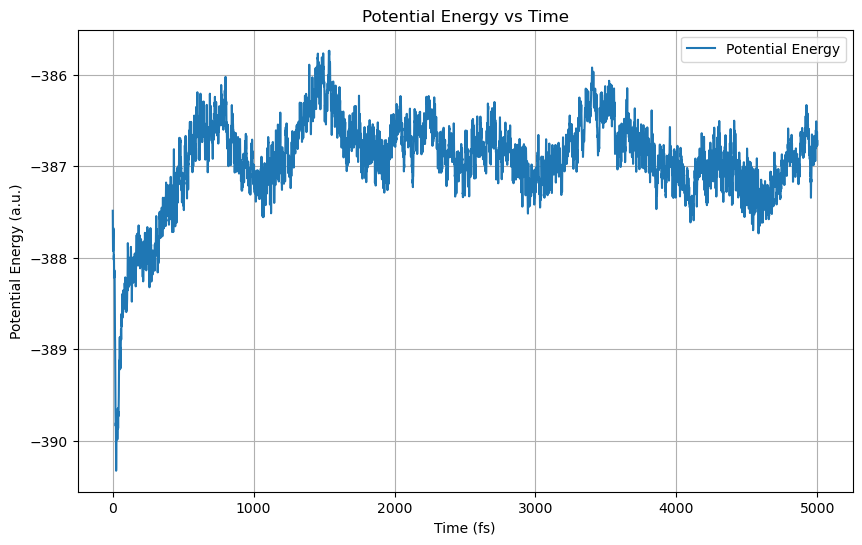

Potential Energy plot saved to ../Figures/Part3_potential_energy_vs_time.png


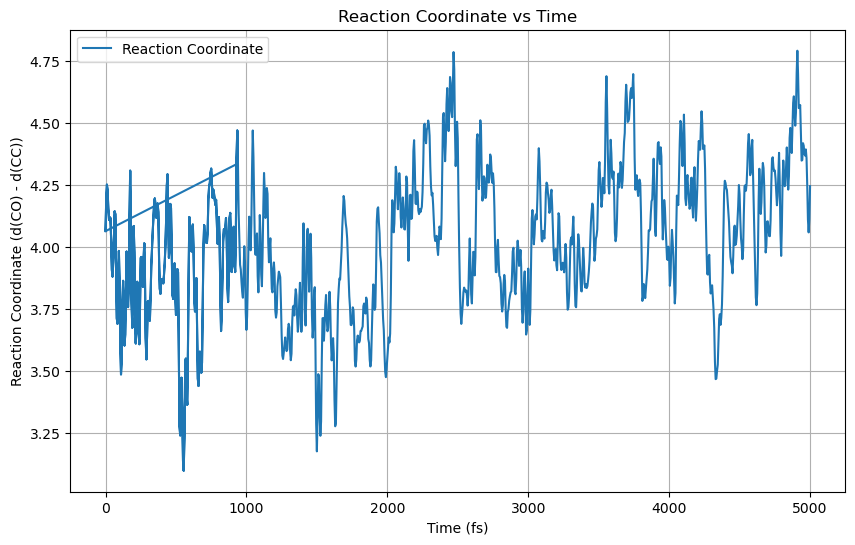

Reaction Coordinate plot saved to ../Figures/Part3_reaction_coordinate_vs_time.png


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load and process the MONITOR-1.ener file
def load_monitor_ener(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    data = [line.split() for line in lines if not line.startswith("#")]
    columns = ["Step", "Time_fs", "Kin_a.u.", "Temp_K", "Pot_a.u.", "ConsQty_a.u.", "UsedTime_s"]
    df = pd.DataFrame(data, columns=columns)
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

monitor_ener_path = "../Outputs/monitor/MONITOR-1.ener"
monitor_ener_data = load_monitor_ener(monitor_ener_path)

# Step 2 (Corrected): Load and process the MONITOR-COLVAR.metadynLog file
def load_monitor_colvar(file_path):
    # Read the file while specifying delimiter and appropriate column names
    df = pd.read_csv(file_path, delim_whitespace=True, header=None, usecols=[0, 1], names=["Time_fs", "Reaction_Coordinate"])
    return df

monitor_colvar_path = "../Outputs/monitor/MONITOR-COLVAR.metadynLog"
monitor_colvar_data = load_monitor_colvar(monitor_colvar_path)

# Step 3: Plot potential energy vs. time
plt.figure(figsize=(10, 6))
plt.plot(monitor_ener_data["Time_fs"], monitor_ener_data["Pot_a.u."], label="Potential Energy")
plt.title("Potential Energy vs Time")
plt.xlabel("Time (fs)")
plt.ylabel("Potential Energy (a.u.)")
plt.grid(True)
plt.legend()
output_potential_energy_plot = "../Figures/Part3_potential_energy_vs_time.png"
plt.savefig(output_potential_energy_plot)
plt.show()
print(f"Potential Energy plot saved to {output_potential_energy_plot}")

# Step 4: Plot reaction coordinate vs. time
plt.figure(figsize=(10, 6))
plt.plot(monitor_colvar_data["Time_fs"], monitor_colvar_data["Reaction_Coordinate"], label="Reaction Coordinate")
plt.title("Reaction Coordinate vs Time")
plt.xlabel("Time (fs)")
plt.ylabel("Reaction Coordinate (d(CO) - d(CC))")  # Correct formula from `monitor.inp`
plt.grid(True)
plt.legend()
output_reaction_coordinate_plot = "../Figures/Part3_reaction_coordinate_vs_time.png"
plt.savefig(output_reaction_coordinate_plot)
plt.show()
print(f"Reaction Coordinate plot saved to {output_reaction_coordinate_plot}")
